
# Creating a timeline with lines, dates, and text

선, 날짜, 텍스트로 타임라인 만들기
Matplotlib 출시 날짜를 사용하여 간단한 타임라인을 만드는 방법.

날짜와 텍스트를 모아서 타임라인을 만들 수 있습니다.   
이 예에서는 Matplotlib의 최신 릴리스 날짜를 사용하여 간단한 타임라인을 만드는 방법을 보여줍니다.  
먼저 GitHub에서 데이터를 가져옵니다.

In [8]:
from datetime import datetime  # datetime 모듈을 가져옵니다.

import matplotlib.pyplot as plt  # Matplotlib의 pyplot 모듈을 가져옵니다.
import numpy as np  # NumPy를 가져옵니다.

import matplotlib.dates as mdates  # Matplotlib의 날짜 모듈을 가져옵니다.

try:
    # Matplotlib 릴리스 및 날짜 목록을 가져옵니다.
    import json
    import urllib.request

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # 날짜 문자열 (예: 2014-10-18)을 datetime으로 변환합니다.
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # 인터넷 연결이 끊어진 경우 등, 예외가 발생할 경우 아래의 목록을 대체로 사용합니다.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # 날짜 문자열 (예: 2014-10-18)을 datetime으로 변환합니다.
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]


다음으로, 근접한 이벤트도 구별하기 위해 수준에 약간의 변화가 있는 줄기 플롯을 만듭니다.   
타임라인의 1차원적 특성을 시각적으로 강조하기 위해 기준선에 마커를 추가합니다.

각 이벤트에 대해 ~.Axes.annotate를 통해 텍스트 라벨을 추가합니다.   
이는 이벤트 라인 끝에서 포인트 단위로 오프셋됩니다.

Matplotlib는 날짜/시간 입력을 자동으로 표시합니다.

## 코드 수행 내용을 아래 단계로 분할해서 설명할 수 있습니다.

1. levels 배열을 만들어 stem plot의 세로 줄 높이를 지정합니다.
2. 그림을 만들고 제목을 설정합니다.
3. vlines를 사용하여 날짜에 수직 줄을 그립니다.
4. 기준선과 마커를 추가합니다.
5. 선 위에 주석을 추가합니다.
6. x축을 4개월 간격으로 포맷합니다.
7. y축과 그래프의 나머지 부분을 제거하여 스타일을 깔끔하게 만듭니다.
8. 그래프를 표시합니다.


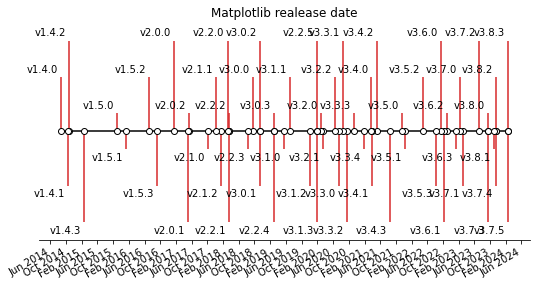

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 몇 가지 예쁜 레벨을 선택합니다.
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# 그림을 생성하고 날짜와 함께 stem plot을 그립니다.
fig, ax = plt.subplots(figsize=(8.8, 4))  # 그림과 축을 만듭니다.
ax.set(title="Matplotlib realease date")  # 제목을 설정합니다.

# 세로 줄을 그립니다.
ax.vlines(dates, 0, levels, color="tab:red")

# 기준선과 마커를 그립니다.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")

# 선에 주석을 추가합니다.
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# x축을 4개월 간격으로 포맷합니다.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# y축과 축을 제거합니다.
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)  # 여백을 추가합니다.
plt.show()  # 그림을 표시합니다.


.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.annotate`
   - `matplotlib.axes.Axes.vlines`
   - `matplotlib.axis.Axis.set_major_locator`
   - `matplotlib.axis.Axis.set_major_formatter`
   - `matplotlib.dates.MonthLocator`
   - `matplotlib.dates.DateFormatter`



## 건설공사

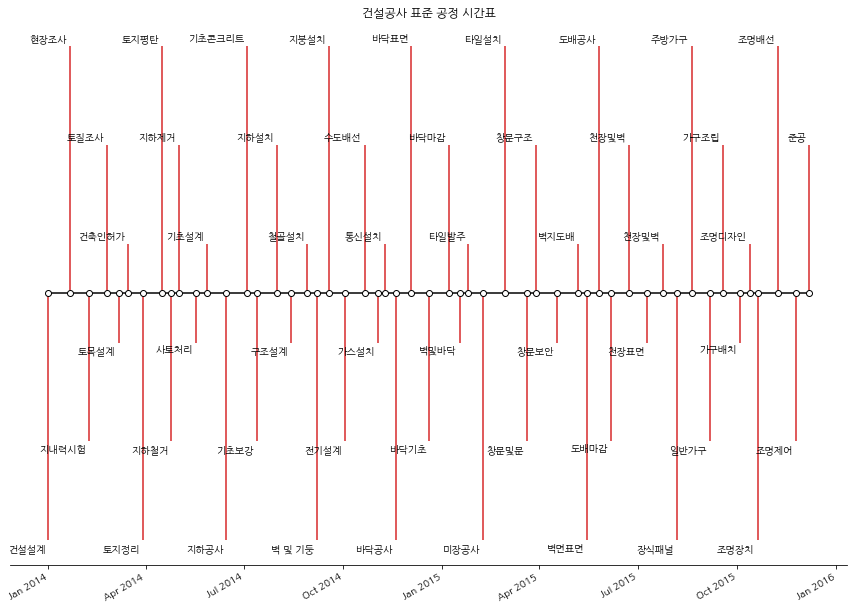

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# 건설공사 표준 공정 목록을 지정합니다.
names = [
    '건설설계', '현장조사', '지내력시험', '토질조사', '토목설계',
    '건축인허가', '토지정리', '토지평탄', '지하철거', '지하제거',
    '사토처리', '기초설계', '지하공사', '기초콘크리트', '기초보강',
    '지하설치', '구조설계', '철골설치', '벽 및 기둥', '지붕설치',
    '전기설계', '수도배선', '가스설치', '통신설치', '바닥공사',
    '바닥표면', '바닥기초', '바닥마감', '벽및바닥', '타일발주',
    '미장공사', '타일설치', '창문및문', '창문구조', '창문보안',
    '벽지도배', '벽면표면', '도배공사', '도배마감', '천장및벽',
    '천장표면', '천장및벽', '장식패널', '주방가구', '일반가구',
    '가구조립', '가구배치', '조명디자인', '조명장치', '조명배선',
    '조명제어','준공'
]

# 날짜 생성
start_date = datetime(2014, 1, 1)
dates = [start_date]
current_date = start_date
for i in range(51):
    random_days = np.random.randint(7, 21)  # 7일부터 21일 사이의 랜덤 값 생성
    current_date += timedelta(days=random_days)
    dates.append(current_date)

# 몇 가지 예쁜 레벨을 선택합니다.
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# 그림을 생성하고 날짜와 함께 stem plot을 그립니다.
fig, ax = plt.subplots(figsize=(15, 10))  # 그림과 축을 만듭니다.
ax.set(title="건설공사 표준 공정 시간표")  # 제목을 설정합니다.

# 세로 줄을 그립니다.
ax.vlines(dates, 0, levels, color="tab:red")

# 기준선과 마커를 그립니다.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")

# 선에 주석을 추가합니다.
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# x축을 모든 날짜로 포맷합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
# y축과 축을 제거합니다.
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
plt.show()  # 그림을 표시합니다.
